# **what is mean by AMI (Amazon Machine Image)**

**AMI (Amazon Machine Image) is a template in AWS that contains the information needed to launch an instance. It includes the operating system, application software, and configurations. AMIs act as a blueprint for creating virtual servers (EC2 instances) in AWS.**

**Example:**

**You want to launch a Linux server with a web application pre-installed. Instead of setting it up manually, you can use an AMI that already has Linux and the web application configured. When you launch an EC2 instance from this AMI, it creates a ready-to-use server based on that template.**


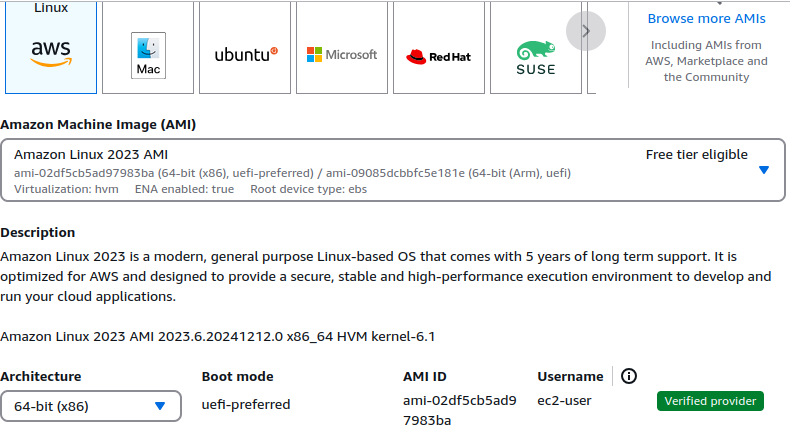

# **What is mean by key pair(Login) ?**

Key Pair (Login) in AWS is a security mechanism that uses public-private key cryptography to securely access your EC2 instances.

**Public Key:** Stored in AWS and associated with the instance.
    
**Private Key:** Downloaded to your local machine and used to authenticate your access.

AWS does not allow password-based login by default, so key pairs are used for secure, password-less SSH access to instances.


# **what is mean by Network Settings**

**VPC (Virtual Private Cloud):**

A VPC is a logically isolated network in AWS where you launch your resources, such as EC2 instances.
    
**Example:**
        
vpc-0f78a240ec8e5df13 is the identifier of a specific VPC.
        
If you want your EC2 instance to belong to a private or public network, you specify the VPC.

**Subnet:**

A Subnet is a segment of a VPC that allows you to group resources based on availability zones.
    
**Example:**
        
Choosing "No preference" allows AWS to pick the default subnet in any availability zone for your VPC.
        
If your application needs high availability, you can manually choose subnets in multiple availability zones.

**Auto-Assign Public IP:**

This option determines whether your instance gets a public IP for internet access.
    
**Example:**
        
Enabling it allows you to SSH into the instance or host a web server that can be accessed over the internet.
        
Charges apply for data transfer beyond the free tier.

**Firewall (Security Groups):**

A Security Group is a set of rules controlling inbound and outbound traffic to your instance.

**Example:**

If AWS creates a security group called launch-wizard-1, it might include these rules:
        
**SSH Traffic (Port 22):**
            
Purpose: Allows secure access to your instance via SSH.
            
Example Rule: Allow SSH from 0.0.0.0/0 (all IPs). Connect using:

ssh -i MyKeyPair.pem ec2-user@<Public-IP>

**HTTPS Traffic (Port 443):**

Purpose: Supports secure web communication (e.g., accessing websites).
    
Example Rule: Allow HTTPS from the internet (0.0.0.0/0).
        
Use it when hosting a secure website using SSL certificates.

**HTTP Traffic (Port 80):**

Purpose: Allows standard web traffic to reach your web server.
    
Example Rule: Allow HTTP from the internet (0.0.0.0/0).
        
Use it to serve a basic web page:

<h1>Welcome to My Web Server!</h1>

Host the page using Nginx or Apache, and it will be accessible to anyone with the instance's public IP.

**Example Setup:**

Launch an EC2 instance in vpc-0f78a240ec8e5df13.
    
Select "Enable Auto-assign Public IP."
    
Use the default subnet.
    
Use the automatically created launch-wizard-1 security group with the above rules.
    
Access the instance via SSH and host a website accessible on HTTP/HTTPS.



# **what is mean by RDP?**

**RDP (Remote Desktop Protocol) is a protocol developed by Microsoft that allows you to connect to and control a Windows-based computer from another device over a network.**

**Uses in AWS:**

In AWS, RDP is used to remotely access and manage Windows EC2 instances.
    
It provides a graphical interface to interact with the instance, just like working on a local Windows computer.

**Example:**

Launch a Windows EC2 instance in AWS.
    
Use an RDP client (like Remote Desktop Connection on Windows or a third-party tool on other operating systems).
    
Enter the public IP of the instance, the username (e.g., Administrator), and the private key to log in securely.
    
Manage your instance through the Windows desktop interface, install applications, or configure settings.

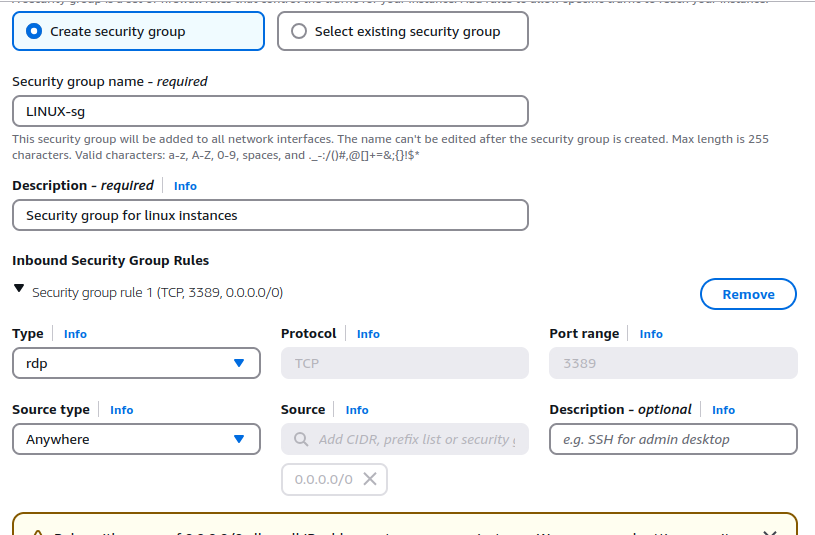

# **what is mean by port number in AWS?**

**A port number is a communication endpoint used in networking. It identifies a specific process or service on a server so that data can be sent and received properly. Each service, like a web server or an SSH server, listens on a specific port.**

**Uses in AWS:**

In AWS, port numbers are crucial for controlling network traffic to and from EC2 instances using security groups. By opening or closing specific ports, you can define what kind of traffic is allowed to reach your instance.

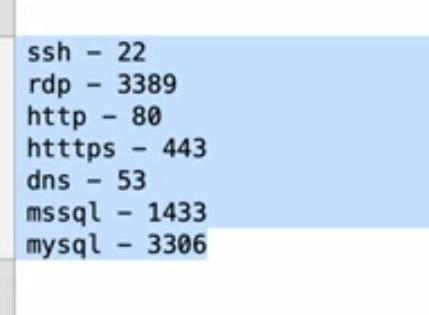

# **Summary:**

**Here’s a simple guide to creating a server, setting up a user, and using a key pair for login in AWS EC2:**

**Create a Server (EC2 Instance):**

    Go to AWS Management Console and navigate to EC2.
    Click Launch Instance.
    Choose an AMI:
        Select an Amazon Machine Image (e.g., Amazon Linux, Ubuntu, or Windows).
    Choose an Instance Type:
        Select the instance type (e.g., t2.micro for free-tier eligible).
    Configure Key Pair:
        If you don’t have a key pair:
            Click Create New Key Pair.
            Enter a name (e.g., MyKeyPair).
            Download the .pem file (important: you can’t download it again).
        If you already have a key pair, select it from the dropdown.
    Configure Network Settings:
        Allow traffic for SSH (port 22) for Linux instances or RDP (port 3389) for Windows.
    Launch Instance:
        Click Launch Instance to create the server.

**Access the Server Using Key Pair (Login):**
For Linux Instances:

    Open a Terminal (Linux/Mac) or use a tool like PuTTY (Windows).
    Set Key File Permissions:

chmod 400 MyKeyPair.pem

SSH Into the Server:

    Use the public IP of your instance:

        ssh -i MyKeyPair.pem ec2-user@<Public-IP>

For Windows Instances:

    Download the RDP File:
        In the EC2 dashboard, select your instance and click Connect > RDP Client.
        Download the .rdp file.
    Decrypt Administrator Password:
        In the AWS Console, use your key pair to decrypt the default Windows administrator password.
    Log In:
        Open the .rdp file and enter the decrypted password to log in.

**Create a User and Set a Password (Optional):**
For Linux Instances:

    Create a New User:

sudo adduser newuser

Set a Password:

sudo passwd newuser

Allow SSH Access:

    Add the user to the sudoers file (optional, for admin access):

        sudo usermod -aG sudo newuser

For Windows Instances:

    Log in using the default administrator credentials via RDP.
    Go to Control Panel > User Accounts and create a new user with a password.

Final Note:

    For better security, use key pairs for authentication instead of passwords whenever possible.
    Always restrict SSH or RDP access in the security group to trusted IP addresses (avoid using 0.0.0.0/0 for unrestricted access).